# Customer Churn Analysis

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

We will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

# Target Variable

Churn is our target variable which contains binary classification. We shall use Classification models to train the dataset.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df= pd.read_csv('Cus_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
pd. set_option('display.max_columns',None)

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.drop('customerID', axis=1, inplace=True)

Dropping 'CustomerID column' since it has only identification number, which has no impact to the target.

In [6]:
df.shape

(7043, 20)

In [7]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Data Exploration

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Check For Null Values

In [10]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

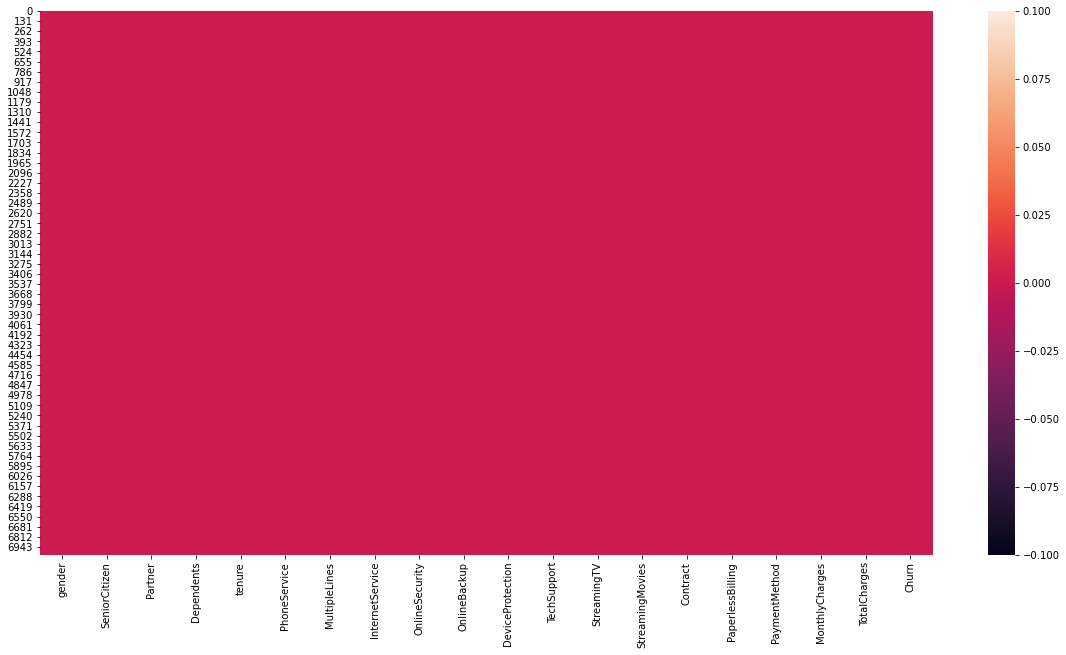

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())

There are no null values in the dataset. So we shall proceed with the further analysis

Categorical Column

In [12]:
cat_column= [x for x in df.dtypes.index if df.dtypes[x]=='object']
cat_column

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [13]:
#Numerical Columns
num_columns= [x for x in df.dtypes.index if df.dtypes[x]=='int64' or df.dtypes[x]=='float64']
num_columns

['SeniorCitizen', 'tenure', 'MonthlyCharges']

# Analyse The Target Variable

In [14]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

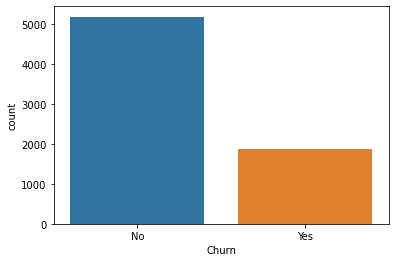

In [15]:
sns.countplot(df['Churn'])

Around 75% data says that customer didnt chrun however 25% customer's status is chruned.

Also there is imbalance in the class so we shall handle it.

In [16]:
# checking the values of each categorical columns
for i in cat_column:
    print(i,"\n",df[i].value_counts(),"\n")
    print('*' * 100)

gender 
 Male      3555
Female    3488
Name: gender, dtype: int64 

****************************************************************************************************
Partner 
 No     3641
Yes    3402
Name: Partner, dtype: int64 

****************************************************************************************************
Dependents 
 No     4933
Yes    2110
Name: Dependents, dtype: int64 

****************************************************************************************************
PhoneService 
 Yes    6361
No      682
Name: PhoneService, dtype: int64 

****************************************************************************************************
MultipleLines 
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

****************************************************************************************************
InternetService 
 Fiber optic    3096
DSL            2421
No             1526
Name: Internet

The column "TotalCharges" has 11 rows as blank data also has float value but gets tagged as object data type. We will need to handle this before we proceed with any further analysis.

In [17]:
df['TotalCharges'] = df['TotalCharges'].replace(' ' , '0.0')
df['TotalCharges'].value_counts()


0.0        11
20.2       11
19.75       9
20.05       8
19.65       8
           ..
158.95      1
3545.05     1
7209        1
1830.1      1
1801.9      1
Name: TotalCharges, Length: 6531, dtype: int64

In [18]:
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['TotalCharges'].dtype

dtype('float64')

We have converted the object data type column to float typecolumn using astype function

In [19]:
#check For unique values
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

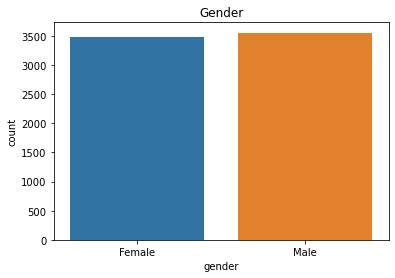

In [20]:
sns.countplot(df['gender'])
plt.title('Gender')
plt.show()

The total number of male and female gender is almost same with males slightly higher 

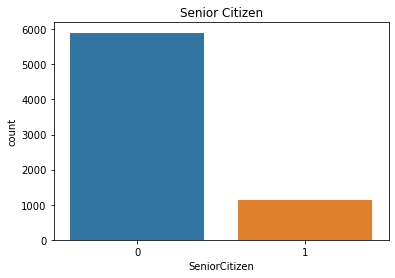

In [21]:
sns.countplot(df['SeniorCitizen'])
plt.title('Senior Citizen')
plt.show()

we can see that the senior citizen value shows 0 to be not senior citizen and 1 as being senior citizen.
Senior citizens are very less compared to the young people.

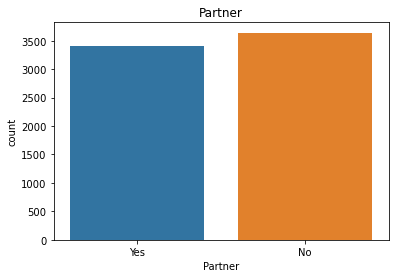

In [22]:
sns.countplot(df['Partner'])
plt.title('Partner')
plt.show()

In the plot we can see that people with no partner are a bit higher than people who have partners.

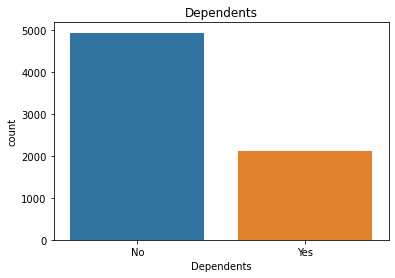

In [23]:
sns.countplot(df['Dependents'])
plt.title('Dependents')
plt.show()

In the plot we can see that people with dependents are very less than people who do not have anyone dependents.

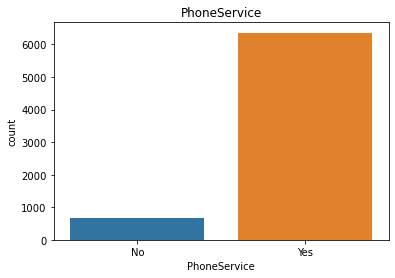

In [24]:
sns.countplot(df['PhoneService'])
plt.title('PhoneService')
plt.show()

Here we see people with phone services are relatively high than peoplewithout phone servives.

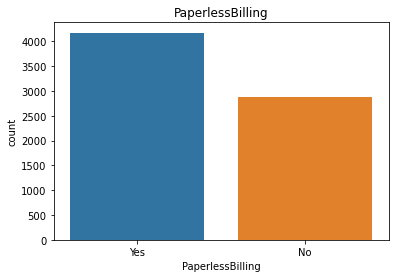

In [25]:
sns.countplot(df['PaperlessBilling'])
plt.title('PaperlessBilling')
plt.show()

In the above plot we can see that people who prefer paper less billing are high in number.

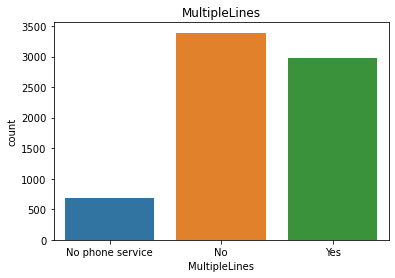

In [26]:
sns.countplot(df['MultipleLines'])
plt.title('MultipleLines')
plt.show()

Here we can see that people with single line are higher in number than people who have multiple lines.There are also people who do not own a phone service yet.

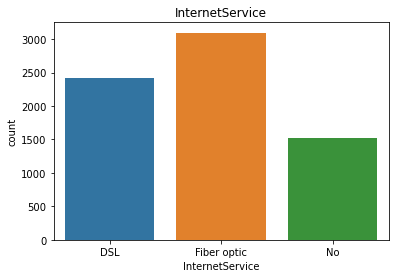

In [27]:
sns.countplot(df['InternetService'])
plt.title('InternetService')
plt.show()

Here, we can see that majority of people have high speed fibre optic internet but there are still people who do not own an internet service at all

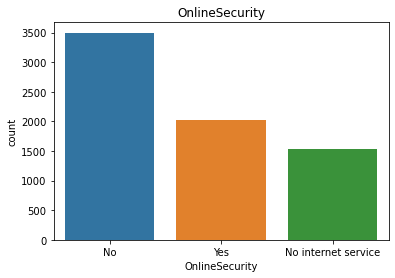

In [28]:
sns.countplot(df['OnlineSecurity'])
plt.title('OnlineSecurity')
plt.show()

In the above plot we see that most people have an internet service but do not use any online security yet.

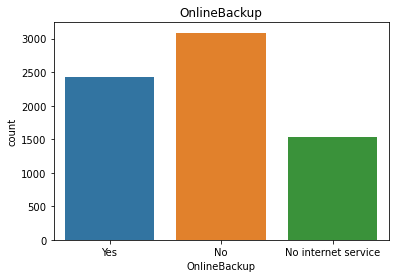

In [29]:
sns.countplot(df['OnlineBackup'])
plt.title('OnlineBackup')
plt.show()

In the above plot we can see that just like people with no internet service and online security there are people who donot have online backup usage.

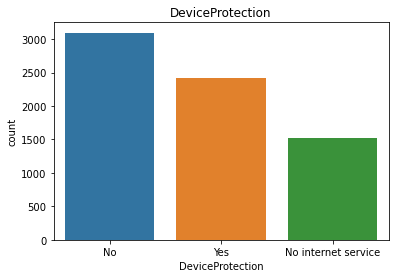

In [30]:
sns.countplot(df['DeviceProtection'])
plt.title('DeviceProtection')
plt.show()

Here, we can see that people without any device protection is higher in number as compared to people who have some device protection.

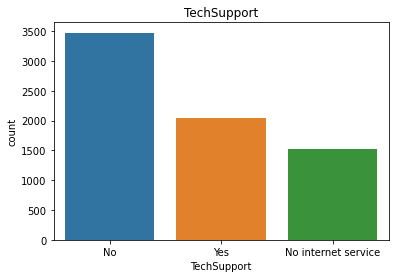

In [31]:
sns.countplot(df['TechSupport'])
plt.title('TechSupport')
plt.show()

Here, we can see that people who do not need technical support is higher in number as compared to those who need technical assistance.

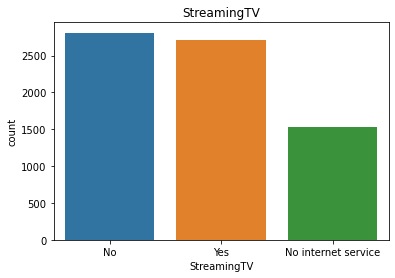

In [32]:
sns.countplot(df['StreamingTV'])
plt.title('StreamingTV')
plt.show()

In the above plot we can see that people who do not use streaming TV service is slightly higher than the people who do use streaming TV.

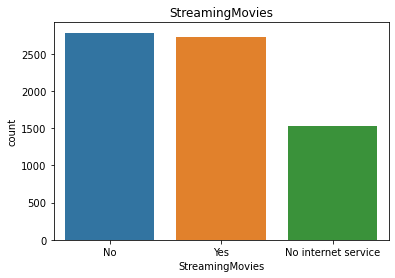

In [33]:
sns.countplot(df['StreamingMovies'])
plt.title('StreamingMovies')
plt.show()

In this plot, we can see that people who do not stream movies a slight higher than people who do enjoy streaming movies online.

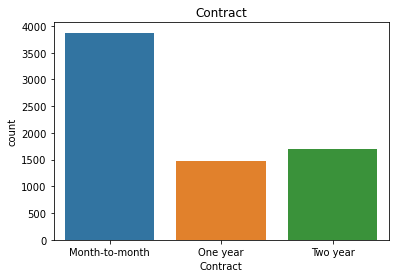

In [34]:
sns.countplot(df['Contract'])
plt.title('Contract')
plt.show()

In the above plot we can see that there are a lot of people who prefer the month to month contract than the 1 year or 2 year contract.

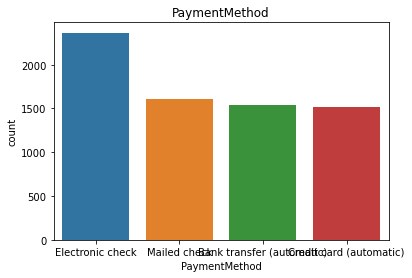

In [35]:
sns.countplot(df['PaymentMethod'])
plt.title('PaymentMethod')
plt.show()

In this plot we can see that the preferred payment amount by people is the electronic check, While people using other options fall in a similar range of numbers.

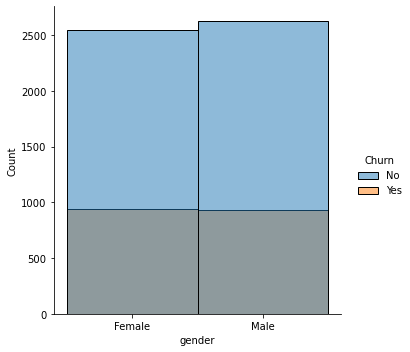

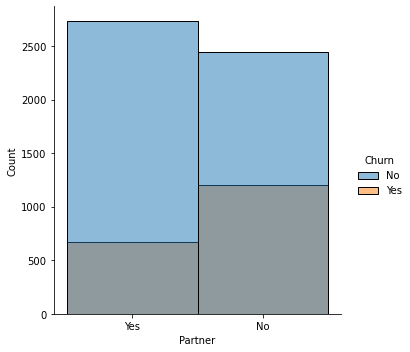

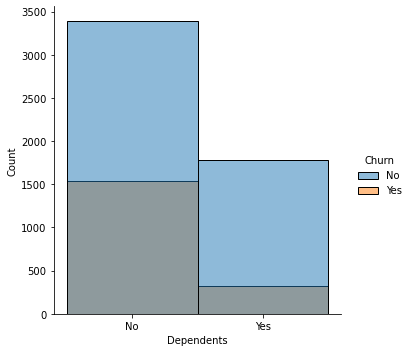

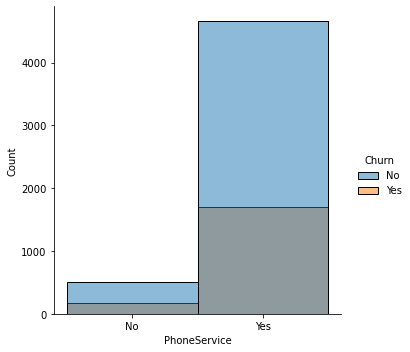

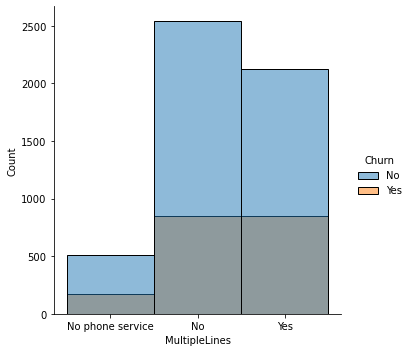

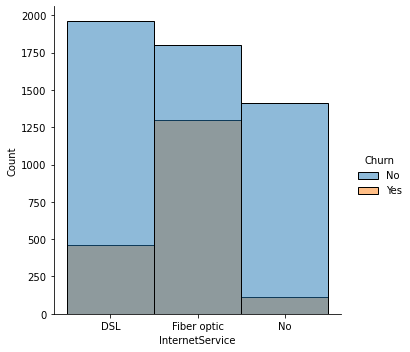

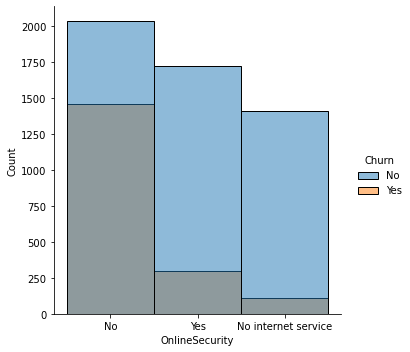

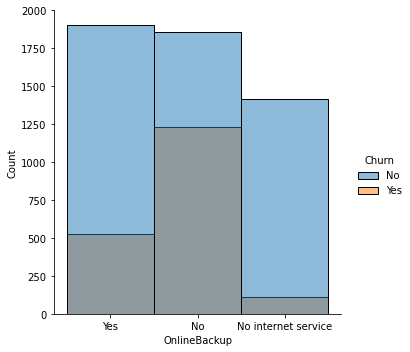

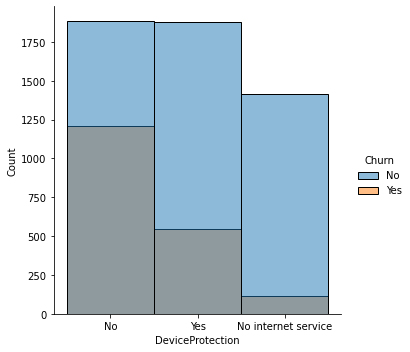

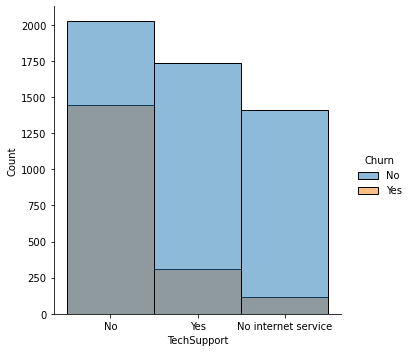

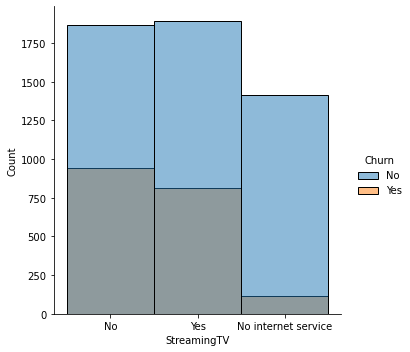

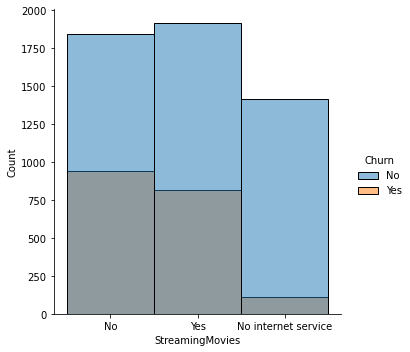

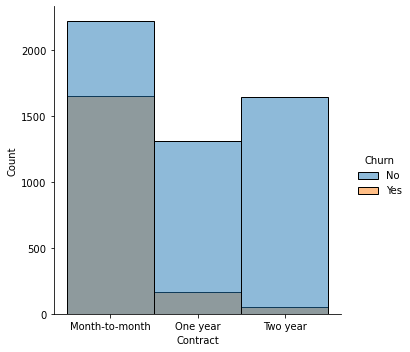

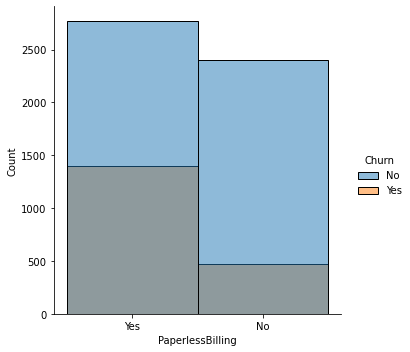

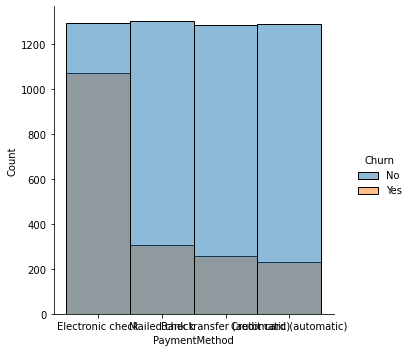

In [36]:
for i in cat_column[0:-2]:
    sns.displot(x=i, hue='Churn', data=df)

With the help of above bar plot we can identify the areas of No churn and Yes churn data.
Most columns have no Churn higher than yes churn which needs to be handled with care to retain the customers.

# Numerical Columns

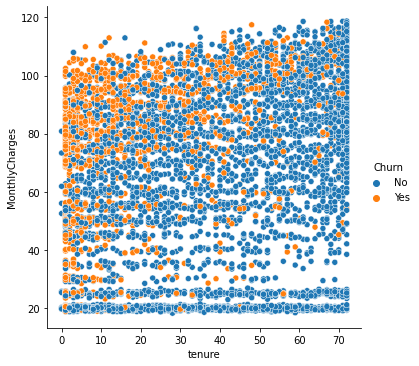

In [37]:
sns.relplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')

The above plot shows us that people who are in the starting stage of service are more prone to switch over if they are not satisfied with the service offered to them. 

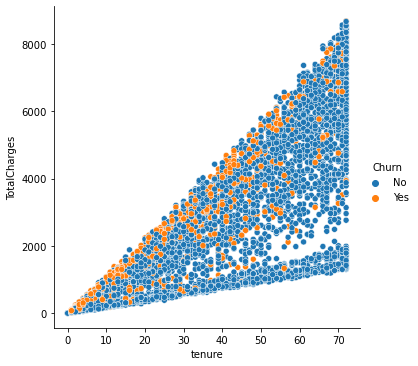

In [38]:
sns.relplot(data=df, x='tenure', y='TotalCharges', hue='Churn')

The above plot shows us that as the tenure increases the total charge also increases and if people have chose to spend a high tenure using the service then the No churn is seen.

# Encode The Categorical Data

In [39]:
LE= LabelEncoder()

In [40]:
for i in cat_column[0:-2]:
    df[i]= LE.fit_transform(df[i])

In [41]:
df['Churn']= LE.fit_transform(df['Churn'])

In [42]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


# Data Description

In [43]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2279.734304,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.794470,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,398.550000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1394.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


# Correlation

In [44]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103006,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317504,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062078,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826178,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113214,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452577,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175755,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253224,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.374410,-0.195525


<AxesSubplot:>

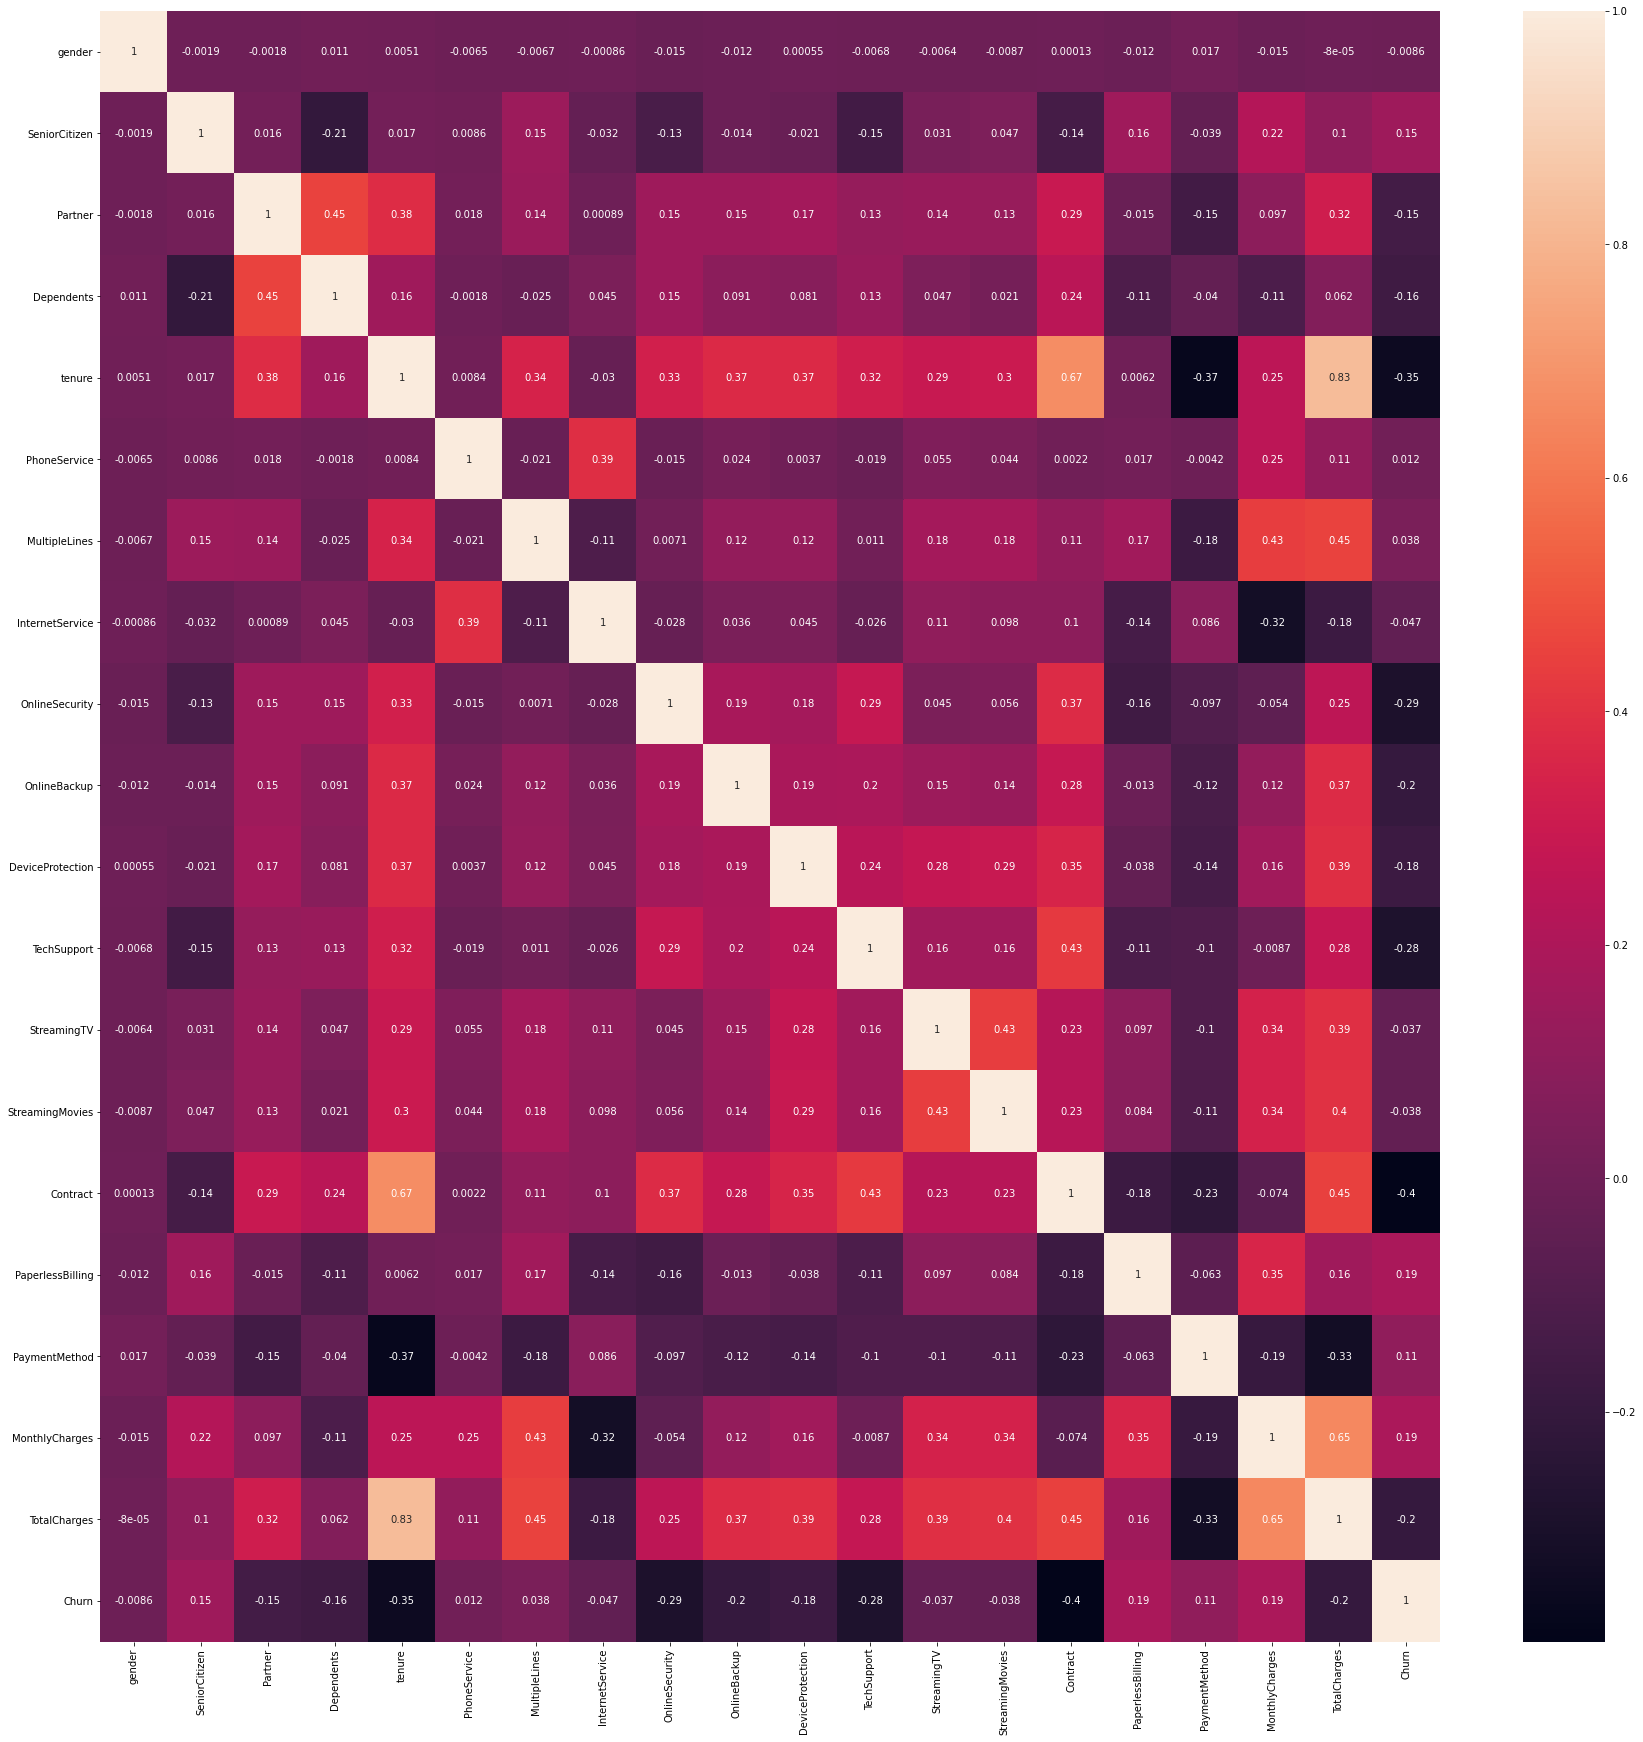

In [45]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot= True)

Monthly Charges and Total Charges are in good correlation. Total Charges and Tenure are in good correlation.Likewise Partner and Dependants are in good correlation


 Now we shall check the collinearity between columns with VIF

# Check For Multi Collinearity- VIF

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
df1=df.drop('Churn', axis=1)

In [48]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [49]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['features']= df1.columns
    return(vif)

In [50]:
vif_fun()

,vif_factor,features
0,1.954601,gender
1,1.369688,SeniorCitizen
2,2.821597,Partner
3,1.964252,Dependents
4,14.909449,tenure
5,15.138336,PhoneService
6,2.752986,MultipleLines
7,4.352778,InternetService
8,2.249502,OnlineSecurity
9,2.456172,OnlineBackup


Phone Service and Tenure are highly correlated, among which Phone service has good contribution to the target, so dropping tenure column.

In [51]:
df1.drop(['tenure'], axis=1, inplace=True)

In [52]:
vif_fun()

,vif_factor,features
0,1.928424,gender
1,1.362230,SeniorCitizen
2,2.753156,Partner
3,1.963359,Dependents
4,14.664265,PhoneService
5,2.696111,MultipleLines
6,4.331105,InternetService
7,2.233726,OnlineSecurity
8,2.443016,OnlineBackup
9,2.630367,DeviceProtection


Phone Service and Monthly Charges are highly correlated to each other in which Monthly Charges contribute more to the target, So dropping Phone Service

In [53]:
df1.drop(['PhoneService'], axis=1, inplace=True)

In [54]:
vif_fun()

,vif_factor,features
0,1.914899,gender
1,1.360058,SeniorCitizen
2,2.747719,Partner
3,1.958265,Dependents
4,2.642096,MultipleLines
5,2.528337,InternetService
6,2.204241,OnlineSecurity
7,2.441023,OnlineBackup
8,2.628556,DeviceProtection
9,2.366156,TechSupport


Now the multi collinearity between the columns are removed. So we shall proceed for the removal of skewness

In [55]:
df1['Churn']=df['Churn']

In [56]:
df2=df1

In [57]:
df2

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


# Check For Skewness

In [58]:
df1.skew().sort_values(ascending=False)

SeniorCitizen       1.833633
Churn               1.063031
TotalCharges        0.963235
Dependents          0.875199
Contract            0.630959
OnlineSecurity      0.416985
TechSupport         0.402365
InternetService     0.205423
DeviceProtection    0.186847
OnlineBackup        0.182930
MultipleLines       0.118719
Partner             0.067922
StreamingTV         0.028486
StreamingMovies     0.014657
gender             -0.019031
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
PaperlessBilling   -0.375396
dtype: float64

 we see that there are columns that are above the acceptable range of +/-0.5 value of skewness. However most of those are categorical columns and we do not have to worry about outliers or skewness in catagorical data therefore we will ignore it.

# Check For Outliers

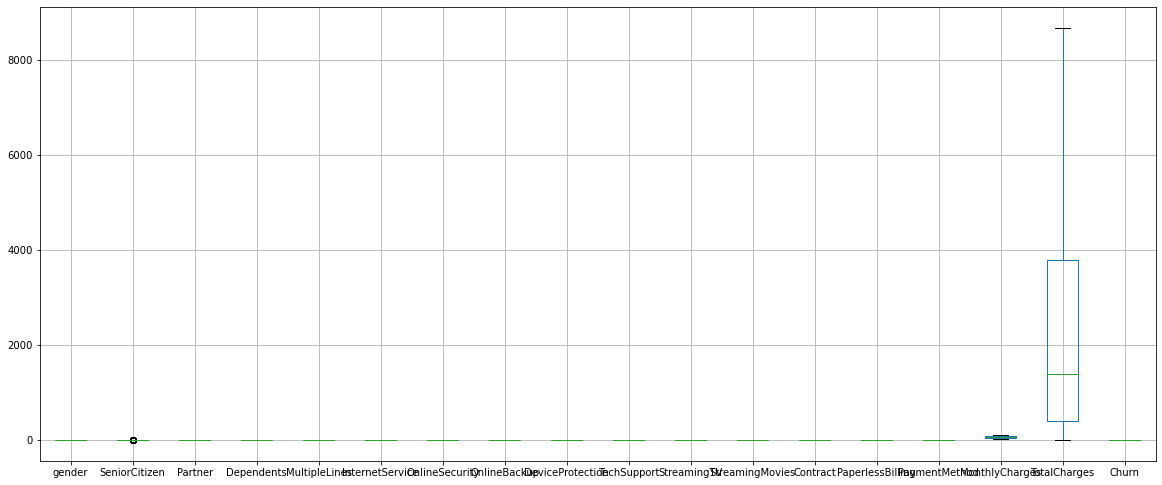

In [59]:
df1.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

The box plot shows there are no outliers in the dataset, So we shall proceed with the training of thr model

# Spliting the data and Balancing 

In [60]:
x= df1.iloc[:,0:-1]
y=df1.iloc[:,-1]

In [61]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

The target variable is highly imbalanced which may affect lead to biasing and low performance. So we shall balance it with SMOTE

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
sm=SMOTE()
x1,y1= sm.fit_resample(x,y)

In [64]:
y1.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

Now the model is balanced. So we will proceed to train the model

Since the Target variable is categorical with only 2 classes, we use LogisticRegression models to train our data

# Scaling of Features

In [65]:
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)
x1.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.863831,-0.397182,1.282124,-0.525315,0.091389,-1.250262,-0.761505,1.448606,-0.896879,-0.771534,-1.044692,-1.054135,-0.645329,0.829181,0.448058,-1.334070,-0.927457
1,1.157634,-0.397182,-0.779956,-0.525315,-0.985715,-1.250262,1.718450,-0.892511,1.442353,-0.771534,-1.044692,-1.054135,0.666371,-1.206010,1.448599,-0.391713,-0.075417
2,1.157634,-0.397182,-0.779956,-0.525315,-0.985715,-1.250262,1.718450,1.448606,-0.896879,-0.771534,-1.044692,-1.054135,-0.645329,0.829181,1.448599,-0.499510,-0.891582
3,1.157634,-0.397182,-0.779956,-0.525315,0.091389,-1.250262,1.718450,-0.892511,1.442353,1.699858,-1.044692,-1.054135,0.666371,-1.206010,-1.553023,-0.901142,-0.097753
4,-0.863831,-0.397182,-0.779956,-0.525315,-0.985715,0.228334,-0.761505,-0.892511,-0.896879,-0.771534,-1.044692,-1.054135,-0.645329,0.829181,0.448058,0.086420,-0.871652


# Train The Model

In [66]:
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Check the best Random State

# LogisticRegression

In [67]:
maxacc=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x1,y1,test_size=20,random_state=i)
    lg=LogisticRegression()
    lg.fit(xtrain,ytrain)
    predlg= lg.predict(xtest)
    acc=accuracy_score(ytest,predlg)
    if acc>maxacc:
        maxacc=acc
        maxRS=i
print("Best Accuracy_score is", maxacc, 'on Random_state',maxRS)

Best Accuracy_score is 0.95 on Random_state 3


# To Find the Best Cross Validation Score

In [68]:
pred_tr= lg.predict(xtrain)
pred_ts= lg.predict(xtest)

In [69]:
train_accuracy= accuracy_score(ytrain,pred_tr)
test_accuracy= accuracy_score(ytest,pred_ts)

In [70]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(lg,x1,y1,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and the accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.763335910320835 and accuracy score for training is 0.7934740511231604 and the accuracy for testing is 0.8


At cross fold 3 the cv score is 0.7731036511318131 and accuracy score for training is 0.7934740511231604 and the accuracy for testing is 0.8


At cross fold 4 the cv score is 0.7849826053343641 and accuracy score for training is 0.7934740511231604 and the accuracy for testing is 0.8


At cross fold 5 the cv score is 0.7867277477742521 and accuracy score for training is 0.7934740511231604 and the accuracy for testing is 0.8


At cross fold 6 the cv score is 0.788370602015311 and accuracy score for training is 0.7934740511231604 and the accuracy for testing is 0.8


At cross fold 7 the cv score is 0.789920475679423 and accuracy score for training is 0.7934740511231604 and the accuracy for testing is 0.8


At cross fold 8 the cv score is 0.7899221195810039 and accuracy score for training is 0.7934740511231604 and the accuracy for testing is 0.8


At

 Random_state= 3, CV score is best with cv=9. So we shall use this values to test other models as well

# Check The Accuracy and Error

In [71]:
xtrain,xtest,ytrain,ytest= train_test_split(x1,y1,test_size=20,random_state=3)

# Logistic Regression

In [73]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
predlg= lg.predict(xtest)
print( confusion_matrix(predlg,ytest))
print( classification_report(predlg,ytest))
print('Score:', lg.score(xtrain,ytrain))
print('Acc_score:', accuracy_score(predlg,ytest))

[[ 7  0]
 [ 1 12]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.92      0.96        13

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

Score: 0.7931835786212239
Acc_score: 0.95


In [75]:
cv_score=cross_val_score(lg,x1,y1, cv=9)
print('Cross Validation Score of LogisticRegression is:', cv_score.mean())

Cross Validation Score of LogisticRegression is: 0.7903996333715938


In [76]:
Diff= 0.95 - 0.7923
Diff

0.15769999999999995

Accuracy Score and CV Score are not same, lets check the otjer models for lesser value of difference between accuracy score and cv score

# GaussianNB

In [77]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
predgnb= gnb.predict(xtest)
print( confusion_matrix(predgnb,ytest))
print( classification_report(predgnb,ytest))
print('Acc_score:', accuracy_score(predgnb,ytest))

[[ 7  0]
 [ 1 12]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.92      0.96        13

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

Acc_score: 0.95


In [78]:
cv_score=cross_val_score(gnb,x1,y1, cv=9)
print('Cross Validation Score of GaussianNB is:', cv_score.mean())

Cross Validation Score of GaussianNB is: 0.7797688391081512


In [80]:
diff= 0.95- 0.7797
diff

0.1703

# DecisionTreeClassifier

In [81]:
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print( confusion_matrix(preddtc,ytest))
print( classification_report(preddtc,ytest))
print('Acc_score:', accuracy_score(preddtc,ytest))

[[ 7  2]
 [ 1 10]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.83      0.91      0.87        11

    accuracy                           0.85        20
   macro avg       0.85      0.84      0.85        20
weighted avg       0.85      0.85      0.85        20

Acc_score: 0.85


In [82]:
cv_score=cross_val_score(dtc,x1,y1, cv=9)
print('Cross Validation Score of DecisionTreeClassifier is:', cv_score.mean())

Cross Validation Score of DecisionTreeClassifier is: 0.7832542475498543


In [83]:
diff= 0.85- 0.7832
diff

0.06679999999999997

# RandomForestClassifier

In [84]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print( confusion_matrix(predrf,ytest))
print( classification_report(predrf,ytest))
print('Acc_score:', accuracy_score(predrf,ytest))

[[ 7  2]
 [ 1 10]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.83      0.91      0.87        11

    accuracy                           0.85        20
   macro avg       0.85      0.84      0.85        20
weighted avg       0.85      0.85      0.85        20

Acc_score: 0.85


In [85]:
cv_score=cross_val_score(rf,x1,y1, cv=9)
print('Cross Validation Score of RandomForestClassifier is:', cv_score.mean())

Cross Validation Score of RandomForestClassifier is: 0.8392090580761259


In [86]:
diff= 0.85- 0.8392
diff

0.010800000000000032

# SVC

In [87]:
svc=SVC()
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print( confusion_matrix(predsvc,ytest))
print( classification_report(predsvc,ytest))
print('Acc_score:', accuracy_score(predsvc,ytest))

[[ 7  0]
 [ 1 12]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.92      0.96        13

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

Acc_score: 0.95


In [88]:
cv_score=cross_val_score(svc,x1,y1, cv=9)
print('Cross Validation Score of SVC is:', cv_score.mean())

Cross Validation Score of SVC is: 0.8070256429661584


In [89]:
diff= 0.95- 0.8070
diff

0.1429999999999999

# KNN

In [90]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
predknn= knn.predict(xtest)
print( confusion_matrix(predknn,ytest))
print( classification_report(predknn,ytest))
print('Acc_score:', accuracy_score(predknn,ytest))

[[ 6  0]
 [ 2 12]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.86      0.92        14

    accuracy                           0.90        20
   macro avg       0.88      0.93      0.89        20
weighted avg       0.93      0.90      0.90        20

Acc_score: 0.9


In [91]:
cv_score=cross_val_score(knn,x1,y1, cv=9)
print('Cross Validation Score of KNN is:', cv_score.mean())

Cross Validation Score of KNN is: 0.7863437645842004


In [92]:
diff=0.9- 0.7863
diff

0.11370000000000002

LinearRegression - 0.1576

GaussianNB- 0.1703

DecisionTreeClassifier- 0.0667

RandomForestClassifier- 0.0108

SVC- 0.1429

KNN- 0.1137

The difference between accuracy score and Cv score is less with RandomForestClassifier which reduces the overfitting of the model. So we shall improve the performance by tuning the Hyper Parameters with GridSearchCV

# HyperParameter Tuning With GridSearchCV

In [95]:
from sklearn.model_selection import GridSearchCV

In [163]:
RandomForestClassifier()

RandomForestClassifier()

In [164]:
parameters={'max_features': ["auto", "sqrt", "log2"],
            'min_samples_leaf': [1,2,3],
            'criterion':["gini", "entropy"],
            'max_depth':[3,4,5,6],
            'min_samples_split': [2,3,4,5]}

In [165]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=9, scoring='accuracy')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [166]:
GCV.best_estimator_

RandomForestClassifier(max_depth=6, max_features='log2', min_samples_leaf=2)

In [167]:
GCV_pred=GCV.best_estimator_.predict(xtest)
accuracy_score(ytest,GCV_pred)

0.95

In [93]:
rf=RandomForestClassifier(criterion='gini',
                          max_depth=6,
                          max_features='log2',
                          min_samples_leaf= 2,
                          min_samples_split=2)
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print( confusion_matrix(predrf,ytest))
print( classification_report(predrf,ytest))
print('Acc_score:', accuracy_score(predrf,ytest))

[[ 7  0]
 [ 1 12]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.92      0.96        13

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

Acc_score: 0.95


After implementing HyperParameterTuning, the accuracy is 95% which indicates the model is working weell with the dataset.

# ROC Curve

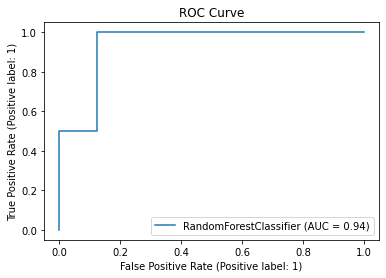

In [94]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf,xtest,ytest)
plt.title('ROC Curve')
plt.show()

The ROC curve shows the Area Under The Curve is 94%

# Save The Model

In [95]:
import pickle
filename= 'cus_churn.pkl'
pickle.dump(rf,open(filename, 'wb'))

# Compare Original results with the Predicted Results

In [96]:
x=np.array(ytest)
predicted= np.array(rf.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con

,original,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,0,0
6,0,0
7,0,1
8,0,0
9,1,1


The predicted results are 95% nearly equal to the actual results. The model gave good performance.